For my final project, I have made a political statement against this use of traffic lights in favor for roundabouts.  I have chosen to simulate 

In [4]:
import simpy
import random

class Vehicle:
    def __init__(self, sim_env, name, speed):
        self.sim_env = sim_env
        self.name = name # name of vehicle for debugging
        self.speed = speed  
        self.enter_time = None

class Intersection:
    def __init__(self, sim_env, type):
        self.sim_env = sim_env
        self.type = type # type of intersection: roundabout or traffic light
        self.vehicles = [] # list of vehicles waiting to go through intersection

    def add_vehicle(self, vehicle):
        vehicle.enter_time = self.sim_env.now
        self.vehicles.append(vehicle)
        print(vehicle.name)
        yield self.sim_env.timeout(1)  # Simulate the time it takes for a vehicle to enter the intersection  
   
class Roundabout:
    def __init__(self, sim_env, intersection):
        self.sim_env = sim_env
        self.intersection = intersection

    def process(self):
        # If there are no more vehicles going through the intersection, exit the simulation
        while True:
        # Process the addition of the first waiting vehicle
            vehicle = self.intersection.vehicles.pop(0)
            yield self.sim_env.process(self.handle_traffic())
            yield self.sim_env.process(self.intersection.add_vehicle(vehicle))
            
    def handle_traffic(self):
        # Choose a random amount of time to wait between 1 and 10 seconds to simulate a vehicle yielding to other vehicles already in the roundabout
        yield self.sim_env.timeout(random.randint(1,10)) 
        

class TrafficLight:
    def __init__(self, sim_env, intersection, toggle_length):
        self.sim_env = sim_env
        self.intersection = intersection
        self.light_color = "GREEN"
        self.toggle_length = toggle_length

    def process(self):
        while True:
            if self.sim_env.now % self.toggle_length == 0:
                if self.light_color == "GREEN":
                    self.light_color = "RED"
                else:
                    self.light_color = "GREEN"
            
            # The cars can pass through the intersection
            if self.light_color == "GREEN":
                print("our car can go!")
                yield self.sim_env.process(self.intersection.add_vehicle(vehicle))
            # Cars cannot go through the intersection, so we wait
            else:
                yield self.sim_env.timeout(self.toggle_length) 
            

            


In [5]:
# Roundabout calculations
roundabout_env = simpy.Environment()

# Create an intersection with roundabout control
roundabout_intersection = Intersection(roundabout_env, type="roundabout")
roundabout_process = roundabout_env.process(Roundabout(roundabout_env, roundabout_intersection).process())

# Create and add vehicles to the roundabout intersection
for i in range(100):
    # According to a quick Google search, roundabout are geometrically designed for the driver to go between 15 and 25mph.  Considering the fact that there are some Speedy Gonzales out there as well as those who don't know how to use the gas pedal, I have adjusted these speeds slightly.
    roundabout_vehicle = Vehicle(roundabout_env, f"Roundabout-Vehicle-{i}", random.randint(10,30))
    roundabout_intersection.vehicles.append(roundabout_vehicle)

# Run the simulation until there are no more vehicles waiting
sim_time = 500
roundabout_env.run(until=sim_time)

# Calculations: Total wait time, average wait time, throughput
roundabout_total_wait_time = 0
vehicles_not_through_intersection = 0

for vehicle in roundabout_intersection.vehicles:
    if vehicle.enter_time:
        print(f"{vehicle.name} entered the intersection at {vehicle.enter_time}")
        roundabout_total_wait_time += vehicle.enter_time
    else:
        vehicles_not_through_intersection += 1

print(f"Roundabout Total Wait Time: {roundabout_total_wait_time} time units")

roundabout_average_wait_time = 0
if roundabout_intersection.vehicles:
    roundabout_average_wait_time = roundabout_total_wait_time / len(roundabout_intersection.vehicles) 
print(f"Roundabout Average Wait Time: {roundabout_average_wait_time} time units")

roundabout_throughput = (len(roundabout_intersection.vehicles) - vehicles_not_through_intersection) / sim_time
print(f"Roundabout Throughput: {roundabout_throughput} vehicles per unit time")

Roundabout-Vehicle-0
Roundabout-Vehicle-1
Roundabout-Vehicle-2
Roundabout-Vehicle-3
Roundabout-Vehicle-4
Roundabout-Vehicle-5
Roundabout-Vehicle-6
Roundabout-Vehicle-7
Roundabout-Vehicle-8
Roundabout-Vehicle-9
Roundabout-Vehicle-10
Roundabout-Vehicle-11
Roundabout-Vehicle-12
Roundabout-Vehicle-13
Roundabout-Vehicle-14
Roundabout-Vehicle-15
Roundabout-Vehicle-16
Roundabout-Vehicle-17
Roundabout-Vehicle-18
Roundabout-Vehicle-19
Roundabout-Vehicle-20
Roundabout-Vehicle-21
Roundabout-Vehicle-22
Roundabout-Vehicle-23
Roundabout-Vehicle-24
Roundabout-Vehicle-25
Roundabout-Vehicle-26
Roundabout-Vehicle-27
Roundabout-Vehicle-28
Roundabout-Vehicle-29
Roundabout-Vehicle-30
Roundabout-Vehicle-31
Roundabout-Vehicle-32
Roundabout-Vehicle-33
Roundabout-Vehicle-34
Roundabout-Vehicle-35
Roundabout-Vehicle-36
Roundabout-Vehicle-37
Roundabout-Vehicle-38
Roundabout-Vehicle-39
Roundabout-Vehicle-40
Roundabout-Vehicle-41
Roundabout-Vehicle-42
Roundabout-Vehicle-43
Roundabout-Vehicle-44
Roundabout-Vehicle-4

In [6]:
# Light calculations
light_env = simpy.Environment()

# Create an intersection with traffic light control
light_intersection = Intersection(light_env, type="traffic light")
light_process = light_env.process(TrafficLight(light_env, light_intersection, toggle_length=10).process())

# Create and add vehicles to the traffic light intersection
for i in range(100):
    # Here, we'll pretend the speed limit is 35 mph.  Because we have some very special drivers, especially in Newport News, I adjusted the range of speeds that people could be going.
    light_vehicle = Vehicle(light_env, f"Traffic-Light-Vehicle-{i}", random.randint(15,50))
    light_intersection.vehicles.append(light_vehicle)

# Run the simulation until there are no more vehicles waiting
sim_time = 500
light_env.run(until=sim_time)

# Calculations: Total wait time, average wait time, throughput
light_total_wait_time = 0
vehicles_not_through_intersection = 0

print(len(light_intersection.vehicles))
for vehicle in light_intersection.vehicles:
    if vehicle.enter_time:
        print(f"{vehicle.name} entered the intersection at {vehicle.enter_time}")
        light_total_wait_time += vehicle.enter_time
    else:
        vehicles_not_through_intersection += 1

print(f"Light Total Wait Time: {light_total_wait_time} time units")

light_average_wait_time = 0
if light_intersection.vehicles:
    light_average_wait_time = light_total_wait_time / len(light_intersection.vehicles) 
print(f"Light Average Wait Time: {light_average_wait_time} time units")

light_throughput = (len(light_intersection.vehicles) - vehicles_not_through_intersection) / sim_time
print(f"Light Throughput: {light_throughput} vehicles per unit time")

our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can go!
Roundabout-Vehicle-72
our car can 

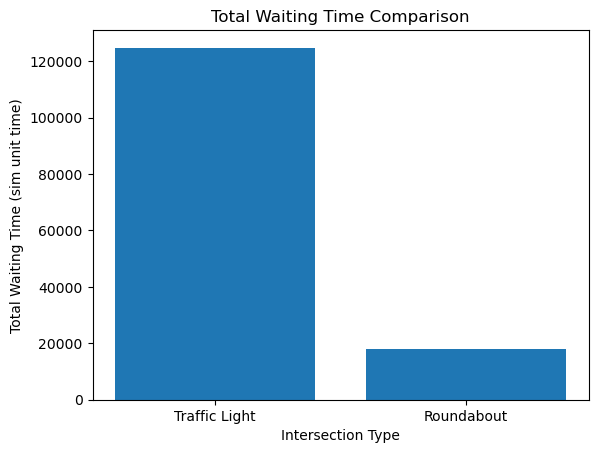

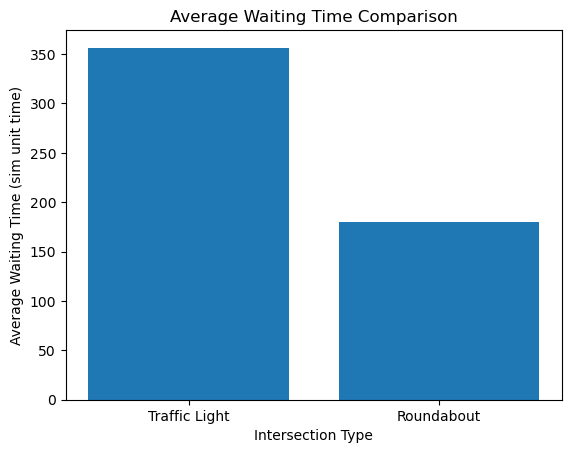

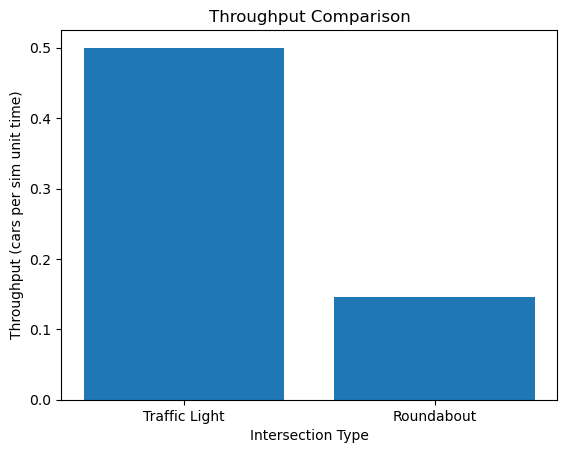

In [7]:
# plot the graphs
import matplotlib.pyplot as plt

# Plotting Total Waiting Time
plt.bar(["Traffic Light", "Roundabout"], [light_total_wait_time, roundabout_total_wait_time])
plt.title("Total Waiting Time Comparison")
plt.xlabel("Intersection Type")
plt.ylabel("Total Waiting Time (sim unit time)")
plt.show()

# Plotting Average Waiting Time
plt.bar(["Traffic Light", "Roundabout"], [light_average_wait_time, roundabout_average_wait_time])
plt.title("Average Waiting Time Comparison")
plt.xlabel("Intersection Type")
plt.ylabel("Average Waiting Time (sim unit time)")
plt.show()

# Plotting Throughput
plt.bar(["Traffic Light", "Roundabout"], [light_throughput, roundabout_throughput])
plt.title("Throughput Comparison")
plt.xlabel("Intersection Type")
plt.ylabel("Throughput (cars per sim unit time)")
plt.show()